## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap PING scan (paranoid)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [4]:
directory = '/home/USER/notebooks/pcaps/nmap_ping_scan_paranoid'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [5]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    329475.59232
Name: time, dtype: float64

In [6]:
duration_list = []
#print(len(merged))
for t in scan_list:
#    t['time'] = pd.to_datetime(t['time'], unit='s')
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [7]:
scan_times
#duration_list

0    329475.592320
1    329479.480034
2    329478.120188
3    329478.369669
4    329477.412681
5    329480.133748
6    329477.955902
7    329477.519843
8    329478.348318
9    329477.565775
Name: Scan times, dtype: float64

In [8]:
temp = pd.DataFrame(duration_list)

In [9]:
temp.mean()

0    329478.049848
dtype: float64

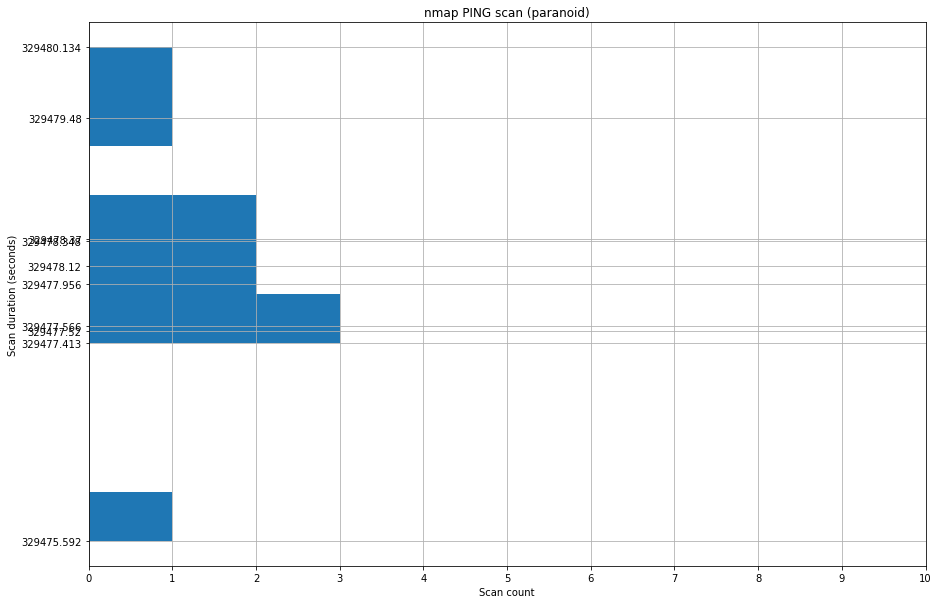

In [10]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [11]:
temp.describe()

,0
count,10.000000
mean,329478.049848
std,1.227186
min,329475.592320
25%,329477.531326
50%,329478.038045
75%,329478.364331
max,329480.133748


## Packet count

In [12]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [13]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [14]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 0.06671157611304407



## Order of ports scanned


In [15]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 53218 80
2 53218 3306
3 53218 139
4 53218 1720
5 53218 443
6 53218 113
7 53218 993
8 53218 199
9 53218 8080
10 53218 110
11 53223 80
12 53218 5900
13 53218 554
14 53218 587
15 53218 23
16 53218 53
17 53218 25
18 53218 256
19 53218 135
20 53218 8888
21 53218 111
22 53225 80
23 53218 22
24 53218 1723
25 53218 143
26 53218 995
27 53218 445
28 53218 3389
29 53218 1025
30 53218 21
31 53218 5214
32 53218 10001
33 53227 80
34 53218 49155
35 53218 50001
36 53218 1079
37 53218 1311
38 53218 2383
39 53218 9943
40 53218 1034
41 53218 2047
42 53218 31038
43 53218 49
44 53229 80
45 53218 11110
46 53218 3737
47 53218 33899
48 53218 7435
49 53218 44443
50 53218 500
51 53218 16992
52 53218 8193
53 53218 9040
54 53218 513
55 53231 80
56 53218 1165
57 53218 2701
58 53218 4550
59 53218 2008
60 53218 50800
61 53218 366
62 53218 32774
63 53218 1068
64 53218 1124
65 53218 3878
66 53233 80
67 53218 15002
68 53218 898
69 53218 10617
70 53218 1114
71 53218 49152
72 53218 1175
73 53218 714
74 53218 9090
75 53

609 53218 711
610 53218 3030
611 53218 5960
612 53218 56738
613 53218 25735
614 53218 32782
615 53218 1141
616 53333 80
617 53218 3920
618 53218 8443
619 53218 40193
620 53218 1060
621 53218 20005
622 53218 2179
623 53218 1099
624 53218 5902
625 53218 3995
626 53218 9917
627 53335 80
628 53218 1524
629 53218 9929
630 53218 9080
631 53218 1503
632 53218 1310
633 53218 3971
634 53218 14238
635 53218 4899
636 53218 7938
637 53218 1053
638 53337 80
639 53218 340
640 53218 2001
641 53218 636
642 53218 1042
643 53218 2702
644 53218 9110
645 53218 1148
646 53218 1007
647 53218 163
648 53218 1719
649 53339 80
650 53218 5961
651 53218 16113
652 53218 1036
653 53218 32785
654 53218 212
655 53218 7002
656 53218 3945
657 53218 32771
658 53218 9595
659 53218 2033
660 53341 80
661 53218 8008
662 53218 7004
663 53218 1038
664 53218 8290
665 53218 2602
666 53218 8042
667 53218 3880
668 53218 5822
669 53218 6000
670 53218 2013
671 53343 80
672 53218 1217
673 53218 1183
674 53218 49400
675 53218 7001
67

677 53806 12000
678 53806 5987
679 53806 2196
680 53806 10009
681 53806 1069
682 53933 587
683 53806 35500
684 53806 687
685 53806 3030
686 53806 1218
687 53806 2179
688 53806 144
689 53806 667
690 53806 3814
691 53806 8192
692 53806 8400
693 53935 587
694 53806 16080
695 53806 1083
696 53806 5911
697 53806 6
698 53806 63331
699 53806 31337
700 53806 9101
701 53806 1533
702 53806 7937
703 53806 5001
704 53937 587
705 53806 3283
706 53806 9877
707 53806 1296
708 53806 49176
709 53806 1110
710 53806 3998
711 53806 1213
712 53806 2251
713 53806 340
714 53806 1097
715 53939 587
716 53806 366
717 53806 3809
718 53806 1073
719 53806 8084
720 53806 1984
721 53806 2393
722 53806 636
723 53806 2604
724 53806 2000
725 53806 7106
726 53941 587
727 53806 5961
728 53806 444
729 53806 7778
730 53806 8007
731 53806 20
732 53806 1026
733 53806 6689
734 53806 3905
735 53806 1186
736 53806 9080
737 53943 587
738 53806 5904
739 53806 9200
740 53806 541
741 53806 3007
742 53806 1164
743 53806 14442
744 53

244 44318 8081
245 44318 9071
246 44318 5030
247 44318 6666
248 44318 9900
249 44318 2909
250 44318 8701
251 44318 5922
252 44318 5280
253 44367 554
254 44318 7106
255 44318 7496
256 44318 1044
257 44318 1999
258 44318 2046
259 44318 5214
260 44318 20
261 44318 50500
262 44318 179
263 44318 5001
264 44369 554
265 44318 1114
266 44318 52673
267 44318 1099
268 44318 7777
269 44318 9290
270 44318 2920
271 44318 3077
272 44318 406
273 44318 3827
274 44318 1218
275 44371 554
276 44318 981
277 44318 30000
278 44318 3322
279 44318 2022
280 44318 27000
281 44318 3369
282 44318 3006
283 44318 1051
284 44318 6565
285 44318 1023
286 44373 554
287 44318 1036
288 44318 5222
289 44318 21571
290 44318 2196
291 44318 3211
292 44318 25735
293 44318 417
294 44318 1011
295 44318 119
296 44318 3372
297 44375 554
298 44318 13782
299 44318 1141
300 44318 1310
301 44318 1117
302 44318 32776
303 44318 3128
304 44318 3261
305 44318 1600
306 44318 1198
307 44318 7019
308 44377 554
309 44318 6123
310 44318 1145


911 44318 5666
912 44318 19
913 44487 554
914 44318 1100
915 44318 1119
916 44318 32770
917 44318 27715
918 44318 3370
919 44318 6667
920 44318 4443
921 44318 9878
922 44318 1064
923 44318 7443
924 44489 554
925 44318 8651
926 44318 873
927 44318 5678
928 44318 4662
929 44318 1500
930 44318 888
931 44318 30951
932 44318 7920
933 44318 50000
934 44318 8093
935 44491 554
936 44318 8181
937 44318 666
938 44318 109
939 44318 5566
940 44318 1097
941 44318 1503
942 44318 1110
943 44318 9009
944 44318 1165
945 44318 32775
946 44493 554
947 44318 5952
948 44318 1075
949 44318 1862
950 44318 1033
951 44318 625
952 44318 25734
953 44318 765
954 44318 714
955 44318 10000
956 44318 55056
957 44495 554
958 44318 1875
959 44318 9110
960 44318 32783
961 44318 7627
962 44318 5440
963 44318 5050
964 44318 2191
965 44318 1201
966 44318 5960
967 44318 33899
968 44497 554
969 44318 1185
970 44318 49154
971 44318 1721
972 44318 50389
973 44318 9666
974 44318 2170
975 44318 7938
976 44318 2065
977 44318 510

478 59627 10004
479 59627 6699
480 59627 1063
481 59627 32783
482 59627 1138
483 59627 3784
484 59718 554
485 59627 9040
486 59627 8082
487 59627 16018
488 59627 6881
489 59627 9081
490 59627 2718
491 59627 8873
492 59627 9898
493 59627 2998
494 59627 62078
495 59720 554
496 59627 5633
497 59627 79
498 59627 2702
499 59627 2005
500 59627 1117
501 59627 2968
502 59627 1104
503 59627 27353
504 59627 1272
505 59627 1072
506 59722 554
507 59627 32771
508 59627 8654
509 59627 3031
510 59627 1037
511 59627 5988
512 59627 10778
513 59627 9594
514 59627 3030
515 59627 683
516 59627 2875
517 59724 554
518 59627 49153
519 59627 65000
520 59627 1216
521 59627 15004
522 59627 7741
523 59627 41511
524 59627 1000
525 59627 7435
526 59627 636
527 59627 5998
528 59726 554
529 59627 1309
530 59627 100
531 59627 6969
532 59627 3283
533 59627 10000
534 59627 2492
535 59627 1434
536 59627 1066
537 59627 49159
538 59627 3211
539 59728 554
540 59627 24444
541 59627 9071
542 59627 18040
543 59627 1165
544 59

46 59334 1688
47 59334 4848
48 59334 1556
49 59334 3880
50 59334 8291
51 59334 5904
52 59334 9111
53 59334 49161
54 59334 146
55 59347 80
56 59334 6567
57 59334 544
58 59334 5850
59 59334 3071
60 59334 5811
61 59334 901
62 59334 40911
63 59334 1088
64 59334 2607
65 59334 2399
66 59349 80
67 59334 1277
68 59334 726
69 59334 10621
70 59334 2909
71 59334 5962
72 59334 7070
73 59334 5730
74 59334 7002
75 59334 81
76 59334 888
77 59351 80
78 59334 3476
79 59334 2920
80 59334 14441
81 59334 464
82 59334 2105
83 59334 311
84 59334 9575
85 59334 2605
86 59334 5190
87 59334 636
88 59353 80
89 59334 5120
90 59334 514
91 59334 9220
92 59334 9110
93 59334 4006
94 59334 49155
95 59334 43
96 59334 1296
97 59334 6580
98 59334 2013
99 59355 80
100 59334 1175
101 59334 1998
102 59334 2001
103 59334 3030
104 59334 5631
105 59334 3918
106 59334 2260
107 59334 1271
108 59334 616
109 59334 6156
110 59357 80
111 59334 55600
112 59334 9503
113 59334 8001
114 59334 1089
115 59334 2038
116 59334 6510
117 59334

712 59334 1718
713 59334 873
714 59334 1078
715 59467 80
716 59334 1042
717 59334 1011
718 59334 999
719 59334 1234
720 59334 9090
721 59334 6123
722 59334 2065
723 59334 8654
724 59334 21571
725 59334 2717
726 59469 80
727 59334 2021
728 59334 8085
729 59334 2135
730 59334 4445
731 59334 425
732 59334 4998
733 59334 8181
734 59334 24800
735 59334 1521
736 59334 49999
737 59471 80
738 59334 5280
739 59334 1914
740 59334 8200
741 59334 4321
742 59334 1044
743 59334 9418
744 59334 163
745 59334 3003
746 59334 1033
747 59334 4126
748 59473 80
749 59334 1073
750 59334 13783
751 59334 28201
752 59334 6004
753 59334 2007
754 59334 1102
755 59334 4003
756 59334 2967
757 59334 52673
758 59334 2161
759 59475 80
760 59334 32775
761 59334 1840
762 59334 8011
763 59334 7920
764 59334 1145
765 59334 1137
766 59334 1154
767 59334 543
768 59334 37
769 59334 8180
770 59477 80
771 59334 667
772 59334 5500
773 59334 2047
774 59334 1151
775 59334 5915
776 59334 4001
777 59334 3322
778 59334 2800
779 5933

280 57138 636
281 57138 1300
282 57138 1533
283 57138 6009
284 57138 50000
285 57138 6001
286 57193 3306
287 57138 1247
288 57138 14000
289 57138 34572
290 57138 714
291 57138 1137
292 57138 2041
293 57138 5679
294 57138 3918
295 57138 1132
296 57138 9575
297 57195 3306
298 57138 1169
299 57138 5510
300 57138 497
301 57138 7496
302 57138 9111
303 57138 55056
304 57138 13783
305 57138 2288
306 57138 593
307 57138 5877
308 57197 3306
309 57138 2010
310 57138 7741
311 57138 5862
312 57138 7938
313 57138 2107
314 57138 13722
315 57138 8011
316 57138 1034
317 57138 2608
318 57138 9101
319 57199 3306
320 57138 2910
321 57138 3001
322 57138 514
323 57138 8291
324 57138 9071
325 57138 3260
326 57138 56737
327 57138 54045
328 57138 2382
329 57138 5357
330 57201 3306
331 57138 3006
332 57138 30718
333 57138 64680
334 57138 5987
335 57138 1600
336 57138 4343
337 57138 5555
338 57138 1066
339 57138 1062
340 57138 9100
341 57203 3306
342 57138 10001
343 57138 340
344 57138 5922
345 57138 2049
346 5

946 57313 3306
947 57138 5822
948 57138 24800
949 57138 5002
950 57138 543
951 57138 19283
952 57138 2004
953 57138 60020
954 57138 4125
955 57138 2103
956 57138 1046
957 57315 3306
958 57138 1801
959 57138 3323
960 57138 32777
961 57138 1259
962 57138 8084
963 57138 3905
964 57138 1700
965 57138 5633
966 57138 5003
967 57138 1131
968 57317 3306
969 57138 5718
970 57138 10010
971 57138 5054
972 57138 5998
973 57138 2007
974 57138 3800
975 57138 3869
976 57138 1023
977 57138 5544
978 57138 9593
979 57319 3306
980 57138 1148
981 57138 1061
982 57138 1719
983 57138 990
984 57138 783
985 57138 1060
986 57138 119
987 57138 32783
988 57138 2366
989 57138 55055
990 57321 3306
991 57138 1124
992 57138 4998
993 57138 9666
994 57138 3546
995 57138 49159
996 57138 8193
997 57138 10617
998 57138 55600
999 57138 1071
1000 57138 10621
1001 57323 3306
1002 57138 6007
1003 57138 8002
1004 57138 1198
1005 57138 5226
1006 57138 9200
1007 57138 1079
1008 57138 2020
1009 57138 49400
1010 57138 2557
1011 5

514 33967 5200
515 33967 32773
516 33967 7512
517 34064 554
518 33967 5357
519 33967 9011
520 33967 4129
521 33967 1088
522 33967 1090
523 33967 50002
524 33967 1149
525 33967 548
526 33967 6129
527 33967 1048
528 34066 554
529 33967 1580
530 33967 5009
531 33967 1812
532 33967 9110
533 33967 407
534 33967 3914
535 33967 1087
536 33967 8009
537 33967 1041
538 33967 264
539 34068 554
540 33967 2099
541 33967 5298
542 33967 6100
543 33967 21571
544 33967 464
545 33967 1984
546 33967 32770
547 33967 1037
548 33967 88
549 33967 3011
550 34070 554
551 33967 5902
552 33967 7435
553 33967 1641
554 33967 3211
555 33967 616
556 33967 1124
557 33967 5221
558 33967 60443
559 33967 9418
560 33967 1900
561 34072 554
562 33967 50300
563 33967 6689
564 33967 1218
565 33967 6543
566 33967 82
567 33967 2909
568 33967 49157
569 33967 15003
570 33967 1152
571 33967 992
572 34074 554
573 33967 1719
574 33967 6547
575 33967 1999
576 33967 722
577 33967 1971
578 33967 8402
579 33967 10626
580 33967 222
581 

81 51441 2909
82 51441 49158
83 51441 1455
84 51441 2401
85 51441 19780
86 51441 1011
87 51441 311
88 51460 110
89 51441 50636
90 51441 7001
91 51441 1971
92 51441 1038
93 51441 2920
94 51441 3920
95 51441 911
96 51441 2875
97 51441 4001
98 51441 43
99 51462 110
100 51441 8022
101 51441 1085
102 51441 20222
103 51441 1322
104 51441 1761
105 51441 9010
106 51441 8010
107 51441 27356
108 51441 3914
109 51441 6112
110 51464 110
111 51441 280
112 51441 40911
113 51441 8087
114 51441 17988
115 51441 106
116 51441 2525
117 51441 8082
118 51441 1053
119 51441 8031
120 51441 9001
121 51466 110
122 51441 5631
123 51441 1688
124 51441 1218
125 51441 8089
126 51441 1023
127 51441 2040
128 51441 30
129 51441 5269
130 51441 48080
131 51441 2170
132 51468 110
133 51441 7402
134 51441 17
135 51441 1583
136 51441 3007
137 51441 668
138 51441 2105
139 51441 1500
140 51441 3580
141 51441 32770
142 51441 1164
143 51470 110
144 51441 5877
145 51441 5925
146 51441 17877
147 51441 5214
148 51441 8192
149 51

748 51580 110
749 51441 1121
750 51441 9
751 51441 2049
752 51441 32774
753 51441 13782
754 51441 3372
755 51441 24444
756 51441 5432
757 51441 417
758 51441 2608
759 51582 110
760 51441 2190
761 51441 1094
762 51441 2000
763 51441 464
764 51441 6668
765 51441 7920
766 51441 65389
767 51441 18040
768 51441 3260
769 51441 497
770 51584 110
771 51441 9009
772 51441 8085
773 51441 26
774 51441 6006
775 51441 2323
776 51441 8649
777 51441 1076
778 51441 1123
779 51441 808
780 51441 1863
781 51586 110
782 51441 4000
783 51441 24800
784 51441 2100
785 51441 1039
786 51441 32773
787 51441 901
788 51441 1138
789 51441 19801
790 51441 15004
791 51441 14442
792 51588 110
793 51441 14441
794 51441 2010
795 51441 1054
796 51441 1864
797 51441 5678
798 51441 1024
799 51441 10778
800 51441 52848
801 51441 6123
802 51441 8292
803 51590 110
804 51441 9220
805 51441 4848
806 51441 1900
807 51441 13783
808 51441 5904
809 51441 5431
810 51441 1045
811 51441 3323
812 51441 902
813 51441 1097
814 51592 110

315 48428 28201
316 48428 9207
317 48428 2393
318 48428 3800
319 48489 23
320 48428 1030
321 48428 6106
322 48428 987
323 48428 13456
324 48428 1154
325 48428 1070
326 48428 44442
327 48428 2008
328 48428 5952
329 48428 5440
330 48491 23
331 48428 2161
332 48428 5510
333 48428 1069
334 48428 3889
335 48428 1334
336 48428 7019
337 48428 6123
338 48428 5100
339 48428 9876
340 48428 1029
341 48493 23
342 48428 32774
343 48428 1556
344 48428 5825
345 48428 3737
346 48428 5961
347 48428 1213
348 48428 1658
349 48428 1112
350 48428 5718
351 48428 16113
352 48495 23
353 48428 3476
354 48428 9220
355 48428 9110
356 48428 1027
357 48428 2179
358 48428 8099
359 48428 1185
360 48428 1971
361 48428 3580
362 48428 1688
363 48497 23
364 48428 50300
365 48428 3017
366 48428 691
367 48428 2030
368 48428 179
369 48428 7004
370 48428 30718
371 48428 2034
372 48428 7920
373 48428 49176
374 48499 23
375 48428 6510
376 48428 1076
377 48428 1666
378 48428 7
379 48428 1322
380 48428 6
381 48428 2366
382 4842

982 48428 2046
983 48428 6004
984 48428 20005
985 48428 7007
986 48428 2301
987 48428 9080
988 48428 3998
989 48428 1094
990 48611 23
991 48428 32779
992 48428 7106
993 48428 1935
994 48428 3945
995 48428 3703
996 48428 24800
997 48428 16000
998 48428 18101
999 48428 8021
1000 48428 548
1001 48613 23
1002 48428 3077
1003 48428 2004
1004 48428 6003
1005 48428 4003
1006 48428 12000
1007 48428 2021
1008 48428 5877
1009 48428 9917
1010 48428 1011
1011 48428 2251
1012 48615 23
1013 48428 513
1014 48428 50636
1015 48428 33899
1016 48428 3827
1017 48428 8500
1018 48428 9485
1019 48428 7625
1020 48428 2013
1021 48428 2065
1022 48428 1028
1023 48617 23
1024 48428 8383
1025 48428 524
1026 48428 5801
1027 48428 5101
1028 48428 32
1029 48428 50389
1030 48428 8400
1031 48428 1117
1032 48428 1309
1033 48428 5432
1034 48619 23
1035 48428 19283
1036 48428 1131
1037 48428 27000
1038 48428 843
1039 48428 7921
1040 48428 10012
1041 48428 4001
1042 48428 1047
1043 48428 5910
1044 48428 2033
1045 48621 23


549 42713 6669
550 42816 256
551 42713 787
552 42713 8192
553 42713 5825
554 42713 6646
555 42713 2045
556 42713 2393
557 42713 3766
558 42713 58080
559 42713 2191
560 42713 514
561 42818 256
562 42713 6059
563 42713 16992
564 42713 720
565 42713 41511
566 42713 6001
567 42713 5960
568 42713 5033
569 42713 9876
570 42713 3011
571 42713 9207
572 42820 256
573 42713 3322
574 42713 5054
575 42713 6692
576 42713 990
577 42713 12345
578 42713 7000
579 42713 2725
580 42713 1594
581 42713 3986
582 42713 8082
583 42822 256
584 42713 16016
585 42713 1123
586 42713 1524
587 42713 8254
588 42713 19350
589 42713 1914
590 42713 4899
591 42713 8654
592 42713 1163
593 42713 1054
594 42824 256
595 42713 8400
596 42713 1198
597 42713 5051
598 42713 50800
599 42713 1011
600 42713 9003
601 42713 1236
602 42713 1600
603 42713 49400
604 42713 9999
605 42826 256
606 42713 56737
607 42713 10626
608 42713 146
609 42713 6025
610 42713 2033
611 42713 9500
612 42713 10000
613 42713 1718
614 42713 1031
615 42713 

In [16]:
orders_port

,scannr,sport,dport
0,1,53218,80
1,2,53218,3306
2,3,53218,139
3,4,53218,1720
4,5,53218,443
...,...,...,...
10985,1095,42713,1075
10986,1096,42713,1192
10987,1097,42713,5226
10988,1098,42713,5214


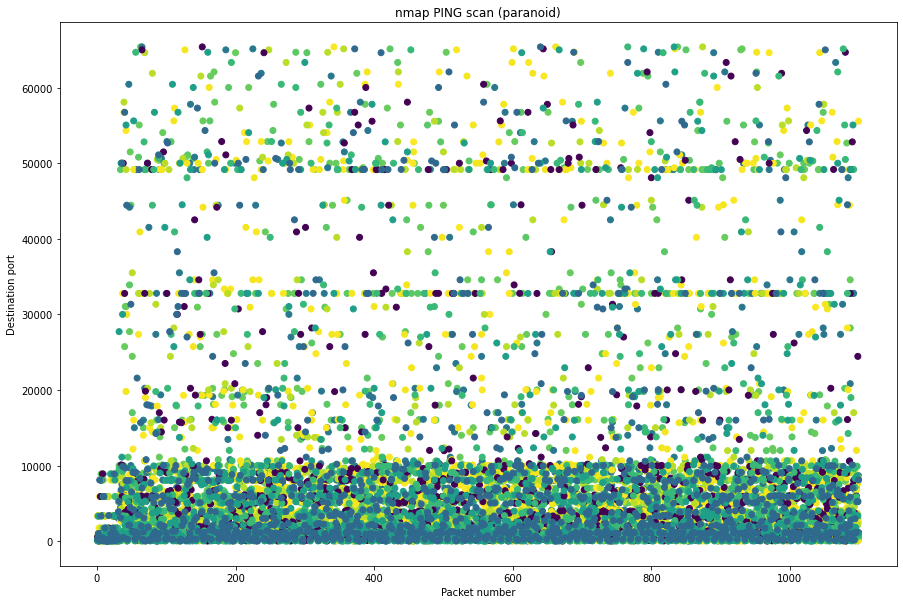

In [17]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [18]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [19]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

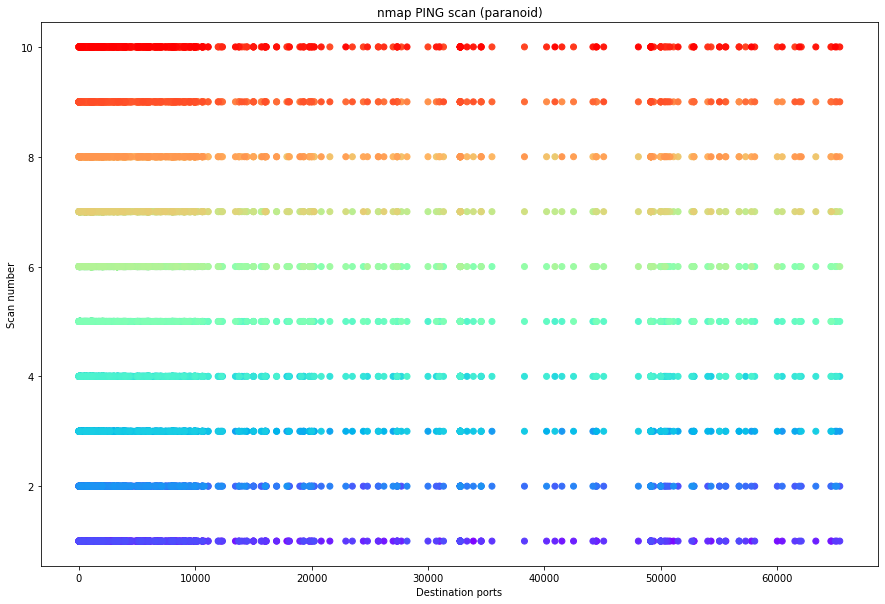

In [20]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


## Payloads

In [21]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

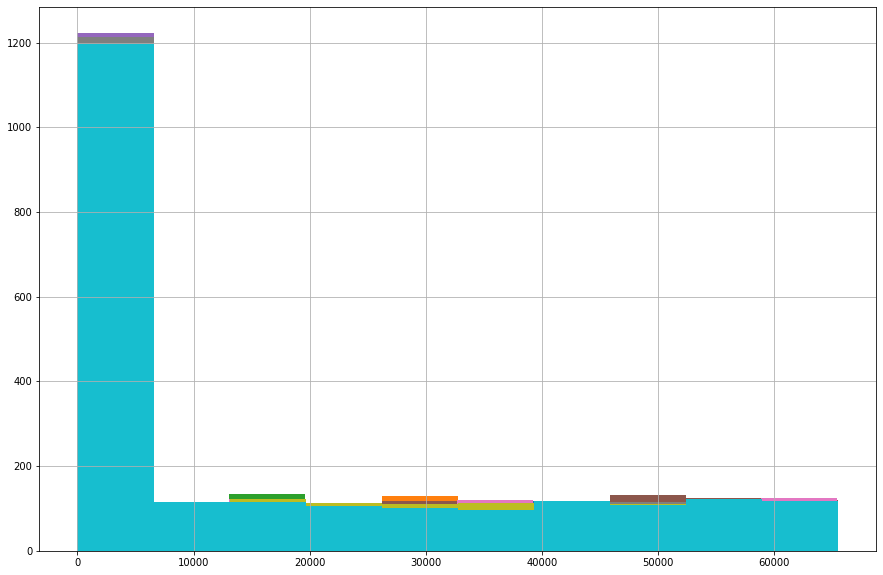

In [22]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

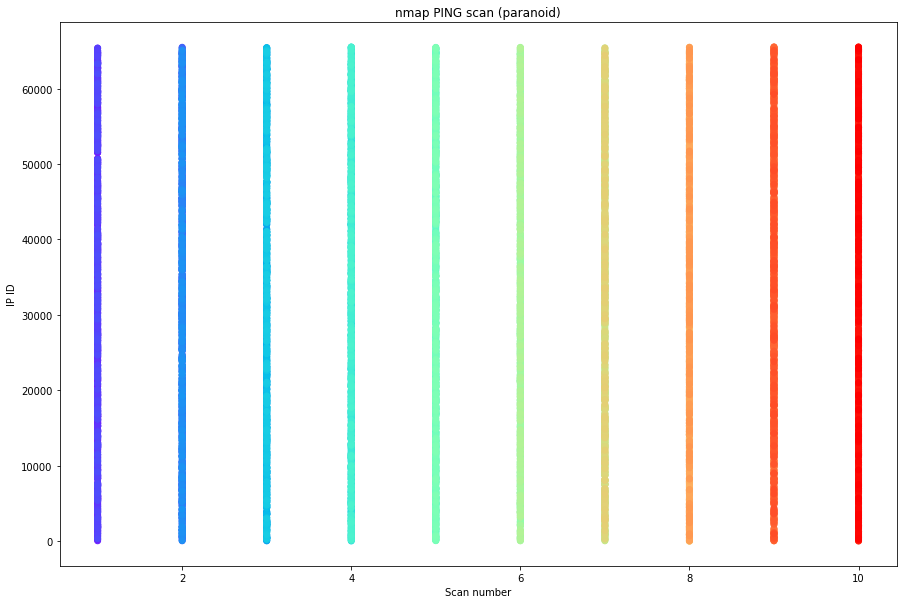

In [23]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


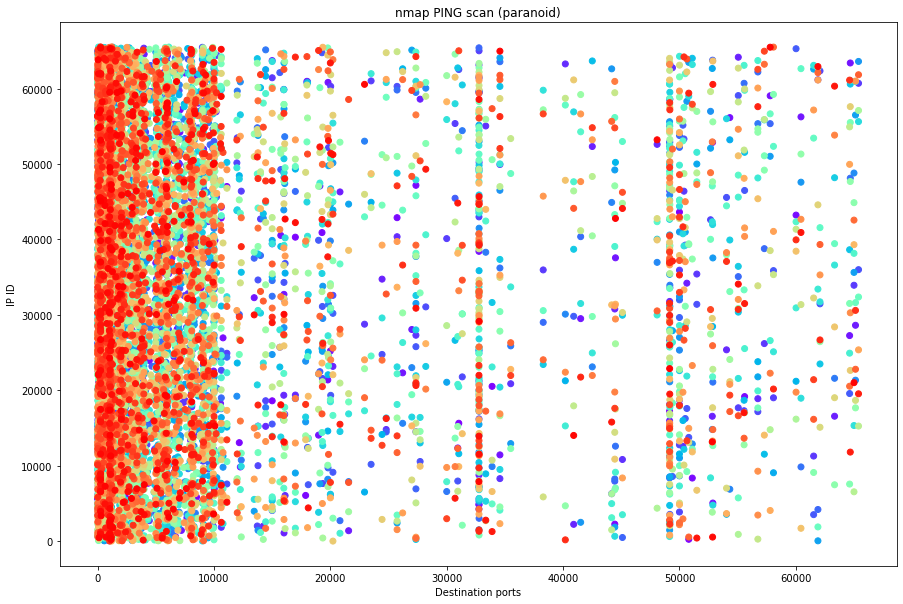

In [24]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

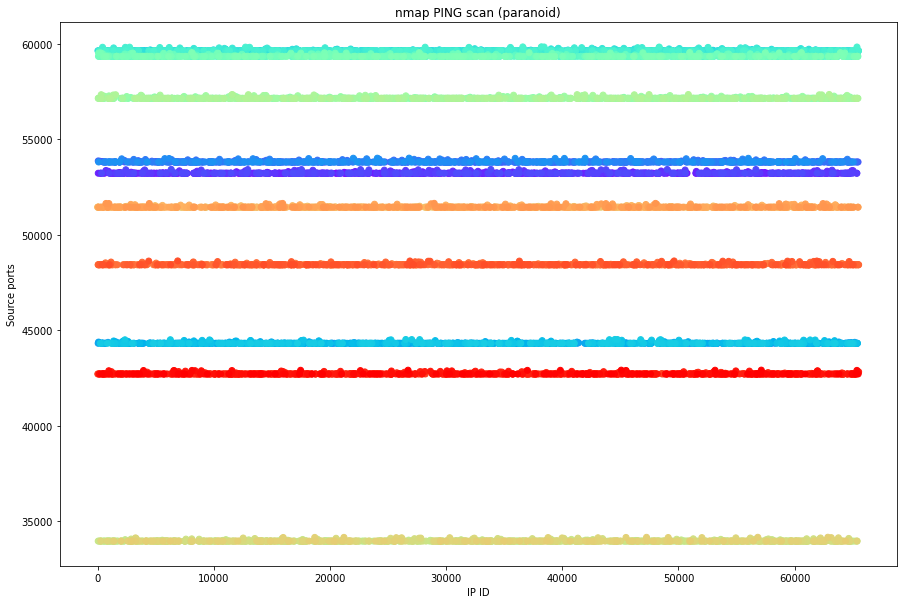

In [25]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
-----
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Pack

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
-----
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Wind

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3869111451
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3869242521
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868325015
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 386

Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3860198419
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3860329489
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 3859411983
Sequence number: 3868783774
Sequence number: 3868783774
Sequence number: 386

Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3481960322
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3484712892
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3484843966
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 3482681245
Sequence number: 348

Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325504286
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325373212
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3324717826
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 332

Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3327994740
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3327339386
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3327208312
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 3325700883
Sequence number: 332

Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 950799511
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 950930581
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 950013083
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
S

Sequence number: 945163373
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 944245875
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 944376945
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 944508023
Sequence number: 955845826
Sequence number: 955845826
Sequence number: 955845826
S

Sequence number: 4002667669
Sequence number: 3993951240
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 3993820170
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 3996310580
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 4002667669
Sequence number: 3996179510
Sequence number: 400

Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1701302491
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1701171417
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1701040351
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 1700188394
Sequence number: 170

Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2004584470
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2001045544
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2001176618
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 200

Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 1998424176
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 1998555250
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 1998162036
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 2003077129
Sequence number: 200

Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4037636365
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4037505283
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4037374209
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 404

Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4027543979
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4027412905
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4027281839
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 4040061290
Sequence number: 402

Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3638083326
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3636903648
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3636772578
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 3631726161
Sequence number: 363

Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3195824002
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3195692932
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 3195561862
Sequence number: 3191826369
Sequence number: 3191826369
Sequence number: 319

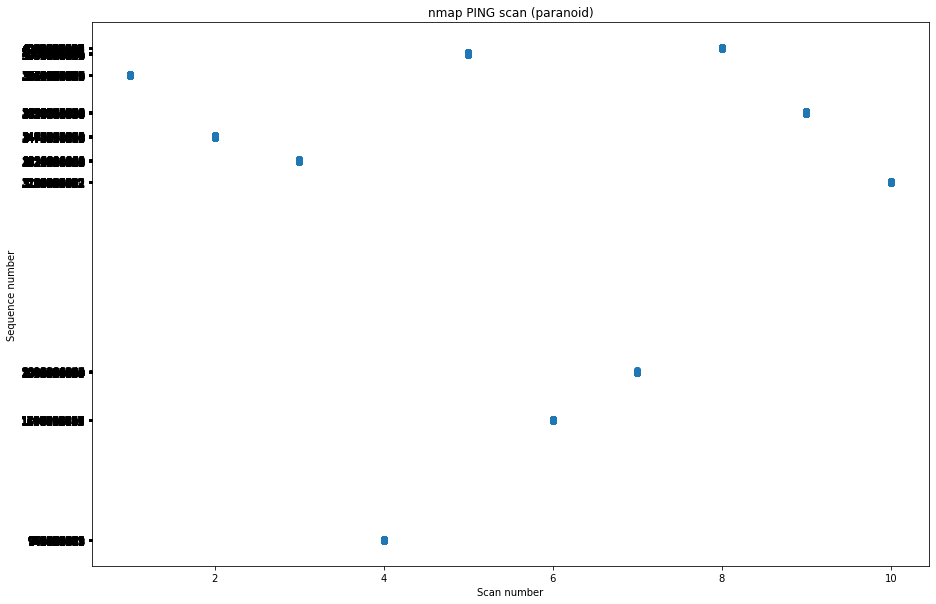

In [29]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


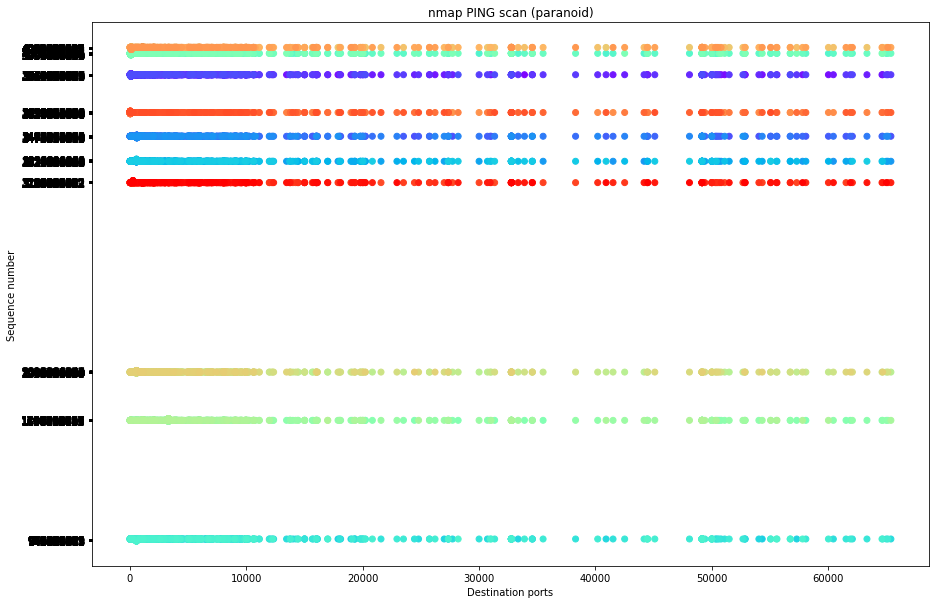

In [30]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

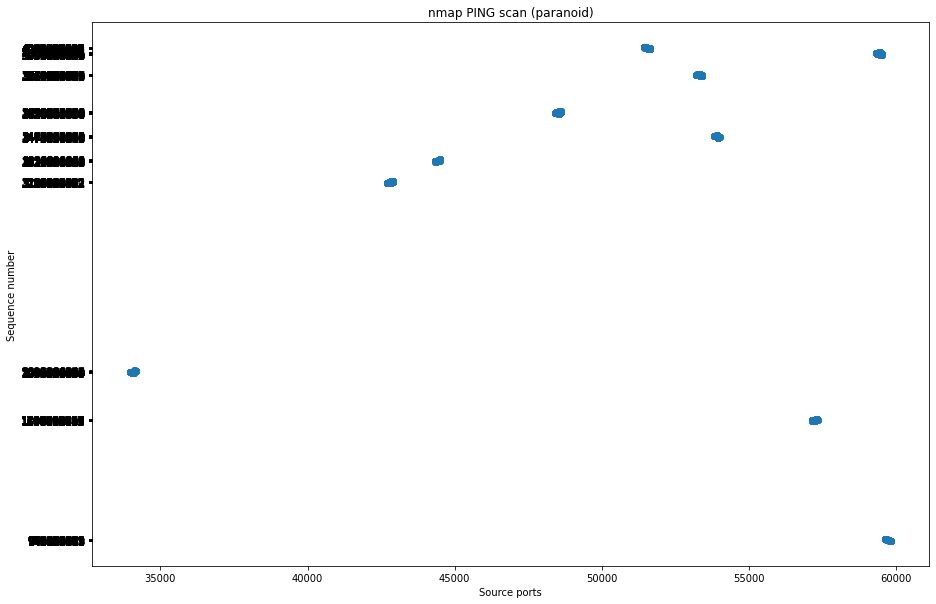

In [31]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [32]:
len(set(orders_port['sport']))

1000

In [33]:
orders_port['sport'].value_counts()[:30]

53218    1000
53806    1000
42713    1000
48428    1000
51441    1000
33967    1000
59334    1000
59627    1000
44318    1000
57138    1000
53241       1
34090       1
34094       1
34096       1
34098       1
34100       1
34102       1
34104       1
34106       1
34108       1
34110       1
34112       1
34114       1
34116       1
34118       1
34120       1
34122       1
34124       1
34126       1
34128       1
Name: sport, dtype: int64

## Flags

In [34]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
-----
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flag

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
-----
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flag

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F